In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import mlflow

In [ ]:
# Set the tracking URI to the local SQLite MLflow registry
mlflow.set_tracking_uri("sqlite:///mlflow.db")

# Set the model to be used for predictions
model_name = "dtc_persona_clustering_model"

In [ ]:

model_uri = f"models:/{model_name}/latest"
model_uri
mlflow_model = mlflow.sklearn.load_model(model_uri)
mlflow_model

KMeans(n_clusters=3, n_init=10)

In [2]:
with open('../data/kmeans_model.pkl', 'rb') as f:
    model = pickle.load(f)
model

KMeans(n_clusters=3, random_state=42)

New data ID: 3089cdd3-6a40-4cfe-b2aa-06e78a7ce559


In [5]:
df_old = pd.read_csv(
    '../data/customer_clusters.csv')
df_old.drop(columns=['label'], inplace=True)
df_old.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.613810,11.431019,6.688004,3.158224,-5.322905,-7.982481,-10.474726,7.316774,1.681931,3.254995
1,-11.949936,11.626840,8.079615,-4.316846,-5.486549,-6.292676,-2.569433,1.678757,-2.069181,-5.322621
2,-7.504861,10.565286,6.389818,-4.593503,-7.777286,-4.620798,-0.616193,2.636350,-2.820305,-3.452583
3,-1.997138,10.979668,7.970828,4.001910,-10.561376,-9.439264,-10.087965,7.375705,3.057618,2.709964
4,-7.891962,6.933150,7.753453,-4.501956,-7.757044,-5.167857,-3.394271,-0.582555,-3.378209,-8.100669


In [7]:
# read new data
df = pd.read_csv(
    '../data/customer_features_07_2025.csv'
)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.645765,9.256778,-8.109234,2.068216,6.953644,5.651685,5.372904,-2.791917,14.171319,4.738355
1,9.349419,4.459915,-10.991486,4.817033,6.495950,3.070540,1.816278,-2.046409,6.754572,3.483198
2,1.201262,-4.348336,-1.326827,2.330883,-3.599211,-5.056687,1.619011,-2.211913,2.431738,2.021709
3,-2.390281,-1.719149,-0.072664,3.495518,-2.730331,-1.374345,5.391430,2.584853,3.181801,-0.287637
4,5.682028,-7.702550,-2.987732,6.260205,3.725979,1.945252,3.699538,1.746068,1.846520,1.948390


In [6]:
# old_labels = model.predict(df_old)
old_labels = mlflow_model.predict(df_old)
old_labels

array([2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1,
       2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2,

In [8]:
new_labels = model.predict(df)

In [10]:
new_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<AxesSubplot: title={'center': 'New Labels Distribution'}, ylabel='Frequency'>

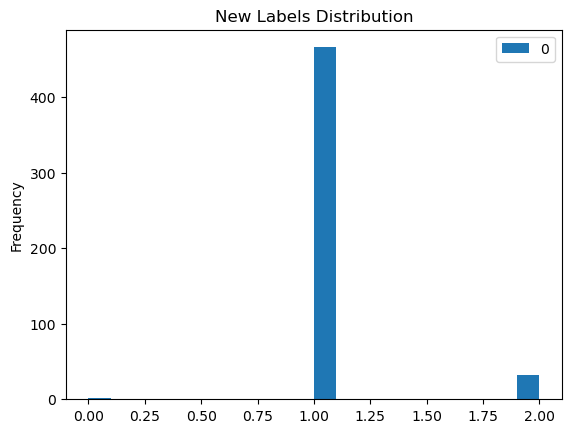

In [16]:
pd.DataFrame(new_labels).plot(kind='hist', bins=20, title='New Labels Distribution')

<AxesSubplot: title={'center': 'Old Labels Distribution'}, ylabel='Frequency'>

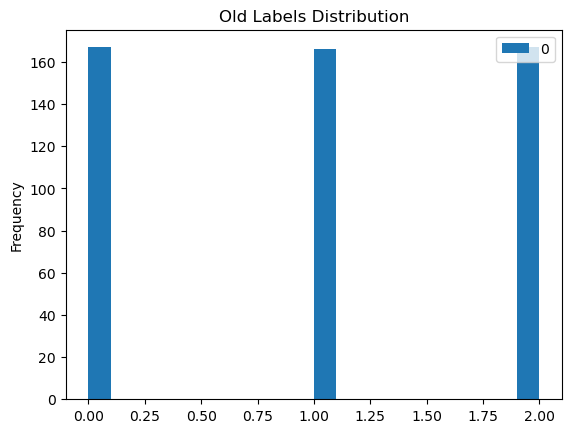

In [18]:
pd.DataFrame(old_labels).plot(kind='hist', bins=20, title='Old Labels Distribution')

In [19]:
new_model = KMeans(n_clusters=3, random_state=42)
new_model.fit(df)

/Users/matthiasmotl/opt/anaconda3/envs/zoomcamp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [22]:
new_model.cluster_centers_

array([[ 5.55091334, -9.46359588,  2.79059664,  4.6765304 , -0.10229346,
        -5.45190363, -6.1411827 ,  5.29377325, -6.73710347, -8.26974133],
       [ 3.39968826,  9.06080187, -9.94526484,  0.12299496,  6.42904025,
         2.3760833 ,  4.20786723, -4.15688504,  8.28196805,  4.11623429],
       [ 0.90170093, -7.40602861, -2.60250568,  3.70758696, -1.17757457,
        -1.77438623,  2.07475095,  0.1158284 ,  2.9753909 ,  1.49200203]])

In [23]:
very_new_labels = new_model.predict(df)

<AxesSubplot: title={'center': 'Nery New Labels Distribution'}, ylabel='Frequency'>

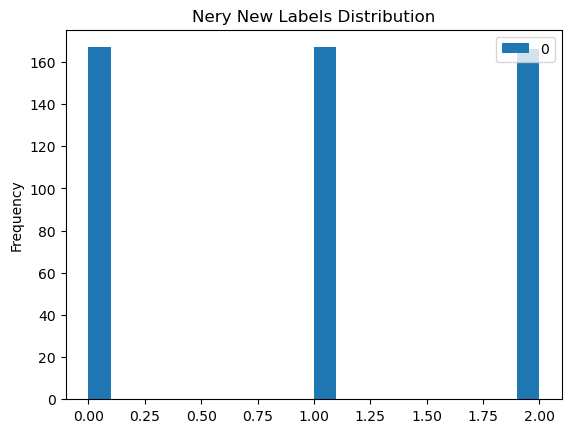

In [ ]:
pd.DataFrame(very_new_labels).plot(kind='hist', bins=20, title='Very New Labels Distribution')